In [1]:
import numpy as np
import seaborn as sns
import pandas as pd

import matplotlib.pyplot as plt

import keijzer_exogan as ke

from sklearn.preprocessing import MinMaxScaler
from tqdm import tqdm
from glob import glob

from sklearn.metrics import r2_score

%matplotlib inline
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"} # Make sure the axis background of plots is white, this is usefull for the black theme in JupyterLab

# Initialize default seaborn layout
sns.set_palette(sns.hls_palette(8, l=.3, s=.8))
sns.set(style='ticks') 

# load inpainting data from the inpainting notebook(s)

In [2]:
general_name = 'test' # general filename, e.g. 'test' for test_reals.npy, test_inpainteds.npy... etc.

# get the file locations of the results
reals = glob('gan_data//val_errors//'+general_name+'*_reals.npy')
inpainteds = glob('gan_data//val_errors//'+general_name+'*_inpainteds.npy')
n_iterations = glob('gan_data//val_errors//'+general_name+'*_n_iterations.npy')

reals

['gan_data//val_errors/test6_reals.npy',
 'gan_data//val_errors/test5_reals.npy',
 'gan_data//val_errors/test4_reals.npy']

In [3]:
# load arrays to list, convert list to ndarray with shape (aspa, n_inpaintings, height, width)
reals = np.concatenate([np.load(path) for path in reals], axis=0)
inpainteds = np.concatenate([np.load(path) for path in inpainteds], axis=0)

In [4]:
reals = reals.mean(axis=1) # take the mean of n_inpaintings per aspa, new shape is (aspa, height, width)
inpainteds = inpainteds.mean(axis=1)

In [5]:
reals = [ke.decode_params_from_aspa(real) for real in reals]
inpainteds = [ke.decode_params_from_aspa(inpainted) for inpainted in inpainteds]

In [6]:
# create dfs for real, inpainted and their percentage errors

reals = pd.DataFrame.from_dict(reals)
inpainteds = pd.DataFrame.from_dict(inpainteds)
errors = (inpainteds - reals) / reals * 100


reals.columns = [column+'_real' for column in reals.columns]
inpainteds.columns = [column+'_inpainted' for column in inpainteds.columns]
errors.columns = [column+'_error' for column in errors.columns]

errors.head()

,ch4_mixratio_error,co2_mixratio_error,co_mixratio_error,h2o_mixratio_error,planet_mass_error,planet_radius_error,temp_profile_error
0,-92.697474,-63.403517,-89.368011,409.462139,75.066469,16.422442,-99.006936
1,0.752494,262.515746,208.038784,465.470131,69.461204,-64.004691,-53.460669
2,-83.019635,260.450054,34.539449,-28.937282,116.384520,-6.118962,-91.175455
3,-92.053432,172.410280,-31.513377,71.464613,-12.261706,107.825377,157.039649
4,409.807868,63.416674,12.748795,-80.482384,-451.802588,-69.738317,-91.860059


In [7]:
# join the dfs together
df = reals.join(inpainteds, how='outer')
df = df.join(errors, how='outer')

In [8]:
df.describe()

,ch4_mixratio_real,co2_mixratio_real,co_mixratio_real,h2o_mixratio_real,planet_mass_real,planet_radius_real,temp_profile_real,ch4_mixratio_inpainted,co2_mixratio_inpainted,co_mixratio_inpainted,...,planet_mass_inpainted,planet_radius_inpainted,temp_profile_inpainted,ch4_mixratio_error,co2_mixratio_error,co_mixratio_error,h2o_mixratio_error,planet_mass_error,planet_radius_error,temp_profile_error
count,8.000000,8.000000,8.000000,8.000000,8.000000e+00,8.000000e+00,8.000000,8.000000,8.000000,8.000000,...,8.000000e+00,8.000000e+00,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,-9.166667,-6.638889,-9.750000,-9.750000,1.898000e+27,7.088199e+07,777.777773,-8.238573,-6.366986,-7.382397,...,2.220994e+27,6.943294e+07,731.581742,164.624845,71.223435,6.193280,86.863254,-45.700056,20.661652,inf
std,5.499719,4.843858,4.472826,5.053418,1.345918e+27,3.411244e+07,778.910745,5.637722,5.709215,3.942682,...,1.360709e+27,3.532749e+07,863.870254,380.939220,148.260122,92.924427,222.093762,180.279082,80.479830,NaN
min,-15.000000,-15.000000,-15.000000,-15.000000,-7.592000e+26,2.874119e+07,0.000000,-13.429121,-14.903424,-13.902410,...,5.116147e+25,2.844340e+07,19.861281,-92.697474,-93.041187,-89.368011,-80.482384,-451.802588,-69.738317,-99.006936
25%,-13.833333,-9.166667,-13.833333,-13.444445,1.644933e+27,3.961623e+07,166.666657,-13.076192,-10.494714,-9.289696,...,1.040238e+27,3.667556e+07,140.271544,-85.278084,-69.948900,-45.713735,-60.111160,-83.133651,-20.590395,-91.346606
50%,-10.333333,-6.444444,-8.777778,-11.888889,1.771467e+27,7.224137e+07,555.555537,-10.760368,-3.897242,-8.007535,...,2.836417e+27,7.308284e+07,245.053887,15.355866,60.220577,-9.382291,-20.129232,0.788114,5.652463,-36.265078
75%,-4.888889,-2.555555,-7.222222,-6.055556,2.783733e+27,1.048665e+08,1277.777782,-2.184136,-2.304033,-4.355390,...,3.118169e+27,1.008584e+08,1266.921949,202.415933,194.420223,26.701065,155.963994,70.862520,42.290395,inf
max,-1.000000,-1.000000,-2.555555,-2.555555,3.796000e+27,1.048665e+08,2000.000000,-1.068372,-0.914201,-1.594798,...,3.833180e+27,1.052126e+08,2312.469244,1010.964414,262.515746,208.038784,465.470131,116.384520,165.579482,inf


In [9]:
df = df.drop(['temp_profile_error','temp_profile_real','temp_profile_inpainted'], axis=1)

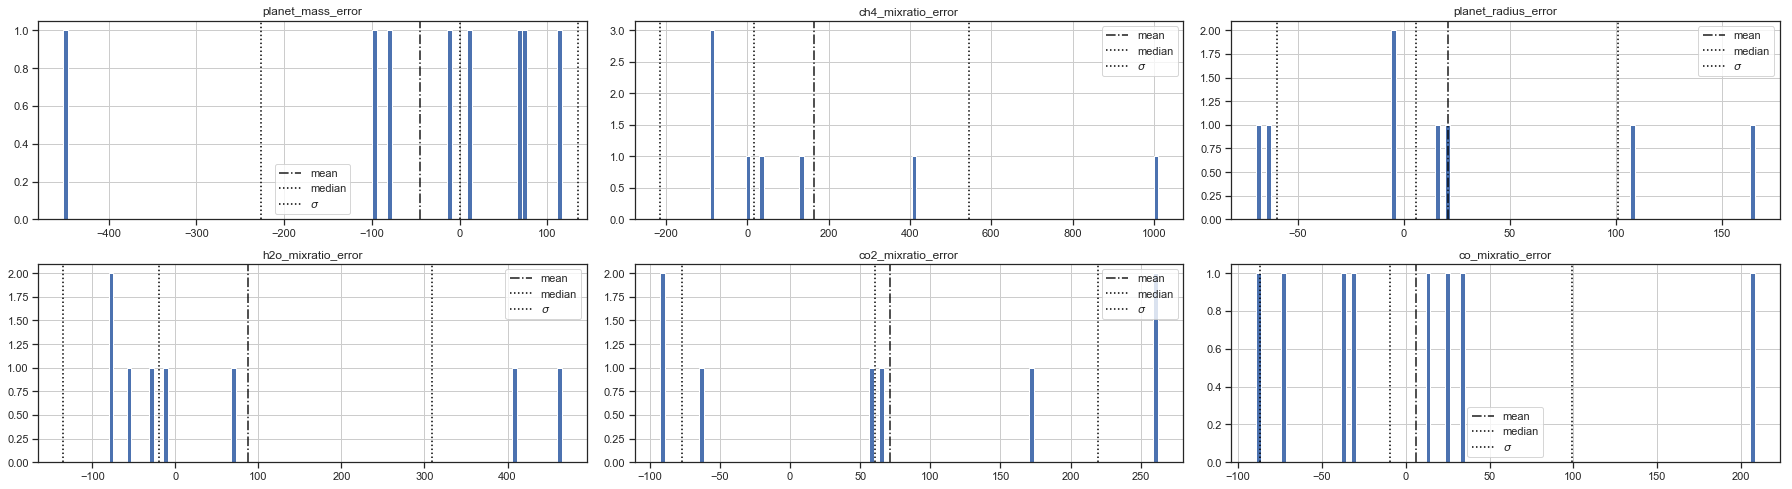

In [10]:
#params = ['planet_mass','temp_profile','ch4_mixratio','planet_radius','h2o_mixratio','co2_mixratio','co_mixratio']
params = ['planet_mass','ch4_mixratio','planet_radius','h2o_mixratio','co2_mixratio','co_mixratio']


plt.figure(figsize=((25,10)))
for i,param in enumerate(params):
    plt.subplot(3,3,i+1)
    plt.title(param+'_error')
    plt.hist(df[param+'_error'], bins=100)
    
    # plot mean and median line
    mu = df[param+'_error'].mean()
    plt.axvline(x=mu,  color='black', linestyle='-.', alpha=0.9, label='mean')
    plt.axvline(x=df[param+'_error'].median(),  color='black', linestyle=':', alpha=1, label='median')

    # plot std lines
    plt.axvline(x=mu-df[param+'_error'].std(),  color='black', linestyle=':', alpha=1, label=r'$\sigma$')
    plt.axvline(x=mu+df[param+'_error'].std(),  color='black', linestyle=':', alpha=1)
    
    plt.legend()
    plt.grid()
    plt.tight_layout()

# Grab the $n$ sigma errors

(0.0, 1.0)

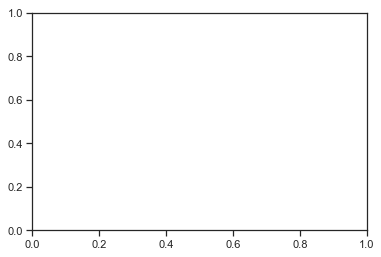

In [11]:
plt.xlim()

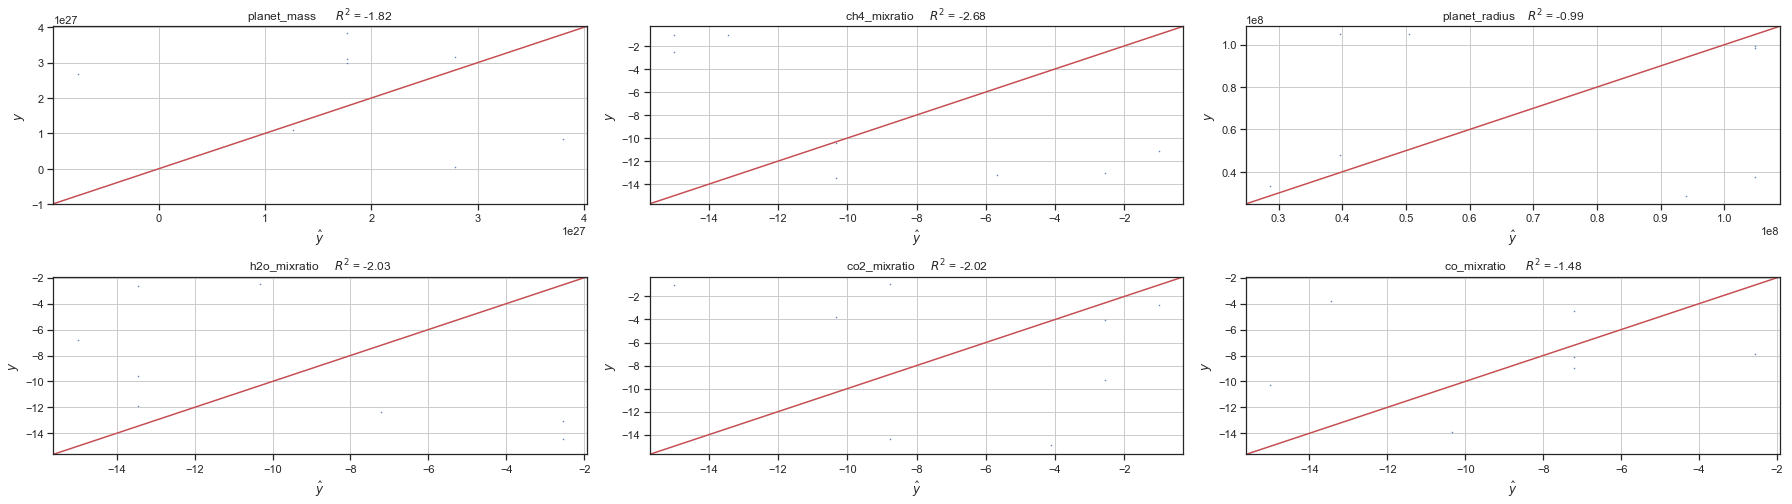

In [12]:
plt.figure(figsize=((25,10)))

for i,param in enumerate(params):
    y_hat = df[param+'_real']
    y = df[param+'_inpainted']
    
    r2 = r2_score(y_hat, y)
    
    plt.subplot(3,3,i+1)

    plt.title(param +' \t $R^2$ = %.2f' % r2)
    plt.plot(y_hat, y, '.', ms=1)
    
    """Force x,y range on the same scale outliers outside of range wont be plotted!"""
    x_min, x_max = plt.xlim()
    x_min = x_min*1
    x_max = x_max*1
    
    plt.ylim((x_min, x_max)) # set y axis range the same as x axis range
    plt.xlim((x_min, x_max))
    
    # Plot the red 'perfect' prediction line
    plt.plot(plt.xlim(), plt.ylim(), ls="-", c='r')
    
    plt.xlabel(r"$\hat{y}$")
    plt.ylabel(r"$y$")
    plt.grid()
    plt.tight_layout()

In [13]:
# Error per parameter

In [14]:
params

['planet_mass',
 'ch4_mixratio',
 'planet_radius',
 'h2o_mixratio',
 'co2_mixratio',
 'co_mixratio']

In [15]:
param = params[5]
print('Param: ', param)

uniques = df[param+'_real'].unique()
print('Uniques: ',uniques)

Param:  co_mixratio
Uniques:  [-15.          -2.55555546 -10.3333334   -7.22222222 -13.44444454]


2 40.90940411358064
1 nan
1 nan
3 32.45663858451356
1 nan


Text(0, 0.5, 'stds')

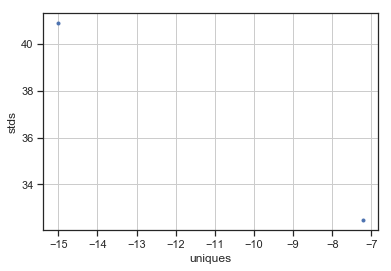

In [16]:
counts = []
stds = []
for unique in uniques:
    t = df[param+'_error'][(df[param+'_real'] == unique)]
    std = t.std()
    count = t.count()
    print(count, std)
    
    counts.append(count)
    stds.append(std)

plt.plot(uniques, stds, '.')
plt.grid()
plt.xlabel('uniques')
plt.ylabel('stds')

### Unique values STD plot
y axis, STD  
X axis, unique values  

This plot shows the STD per parameter value (10 values for ExoGAN data)

Horizontal -. line is the 10% line

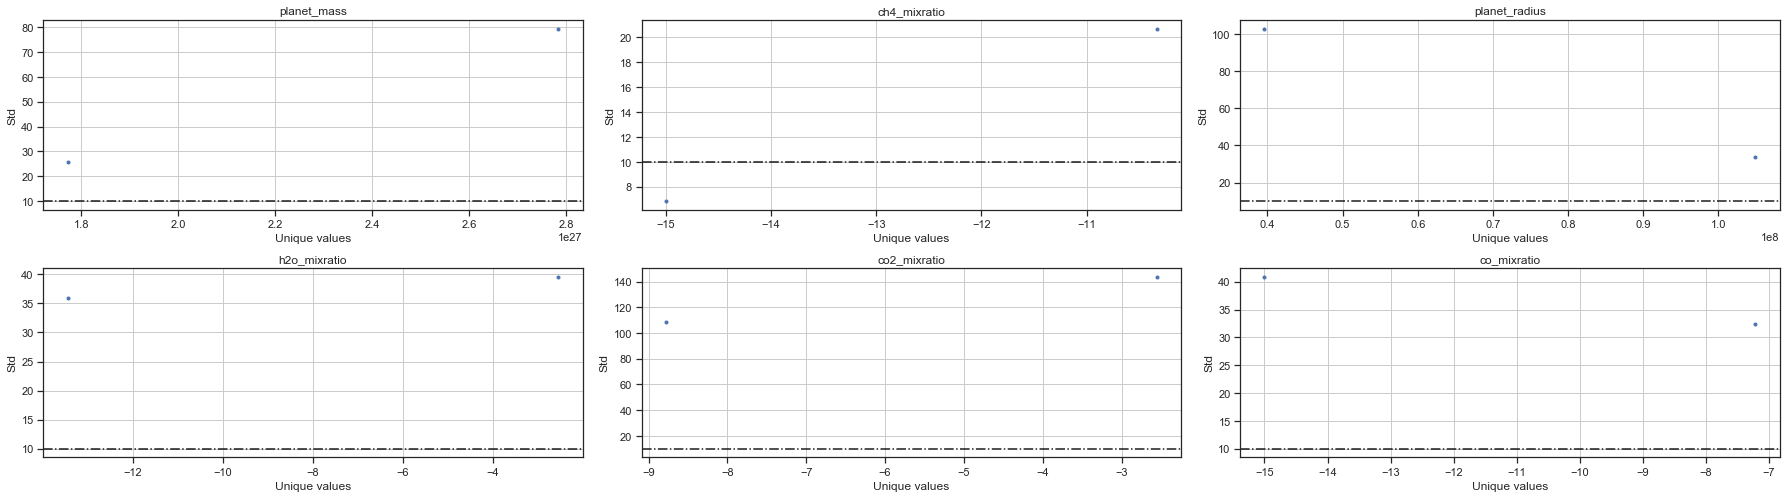

In [17]:
plt.figure(figsize=((25,10)))

for i,param in enumerate(params):
    uniques = df[param+'_real'].unique()
    
    counts = []
    stds = []
    for unique in uniques:
        t = df[param+'_error'][(df[param+'_real'] == unique)]
        std = t.std()
        count = t.count()
        #print(count, std)

        counts.append(count)
        stds.append(std)

    plt.subplot(3,3,i+1)
    plt.plot(uniques, stds, '.')
    
    plt.axhline(y=10,  color='black', linestyle='-.', alpha=0.9)
    
    """layout"""""
    plt.grid()
    plt.title(param)
    plt.xlabel('Unique values')
    plt.ylabel('Std')
    plt.tight_layout()
    